In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [12]:
with open('choicesPOLYKernelQ1.pickle', 'rb') as f:
    PolyQ1 = pickle.load(f)
with open('choicesPOLYKernelQ2.pickle', 'rb') as f:
    PolyQ2 = pickle.load(f)
with open('choicesPOLYKernelQ3.pickle', 'rb') as f:
    PolyQ3 = pickle.load(f)
with open('choicesPOLYKernelQ4.pickle', 'rb') as f:
    PolyQ4 = pickle.load(f)
with open('choicesPOLYKernelQ5.pickle', 'rb') as f:
    PolyQ5 = pickle.load(f)

allchoices =[]
allchoices += PolyQ1
allchoices += PolyQ2
allchoices += PolyQ3
allchoices += PolyQ4
allchoices += PolyQ5

In [3]:
with open('choicesPOLYKernel.pickle', 'rb') as f:
    allChoices = pickle.load(f)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
scale = [1,2,3,4,5,6]
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
for choices in allChoices:
    (gamma,regscale,scores) = choices
    ax.plot(scale,scores[0])
ax.set_xscale("log")
ax.set_xlabel('gamma parameter')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.show()
fig.savefig('gamma_para.pdf')

NameError: name 'allChoices' is not defined

In [8]:
# After a threshold value, similar performance is achievable for different choice of regscale.
# Threshold value varies only by atmost a single step.
# Above results using 10 points on a scale between mu values to be estimated.

In [9]:
from Utilities.hyperparameterChoice import returnMaxRange
width =1e-4
percentage  =0.90
(gamma,regscale,scores) = allChoices[0]
lim2 = returnMaxRange(scores[1],scale,percentage)
lim1 = lim2*1e-4

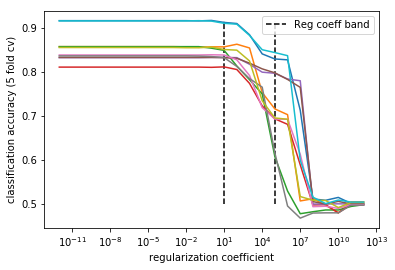

In [29]:
i = 1
(gamma,regscale,scores) = allChoices[0]
lim2 = returnMaxRange(scores[i],scale,percentage)
lim1 = lim2*1e-4


scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
scaleInt = [1,2,3,4,5,6]
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
for choices in allchoices:
    (gamma,regscale,scores) = choices
    ax.plot(scale,scores[i])
ax.set_xscale("log")
ax.set_xlabel('regularization coefficient')
ax.set_ylabel('classification accuracy (5 fold cv)')
ax.vlines(lim1,min(scores[i]),max(scores[i]),linestyles= '--',label = 'Reg coeff band')
ax.vlines(lim2,min(scores[i]),max(scores[i]),linestyles='--')
plt.legend()
plt.show()
fig.savefig('reg_coeffDeg2.pdf')

In [ ]:
#Note max accuracy for degree 2 multi mu values. -more obvious close to center.
#Note again prop holds for degree 2,3,5 much harder regularization for degree 1,4,6. -entire scale 20,20.

In [8]:
#Also means if you want a faster estimation and a dont mind being slightly less precise, you can do a one time calculation and use fixed classifier parameters.
# In that case, only run kernel classification the number of points that are being estimated.

In [9]:
#I have for my experiments used made a one time selection of lernel parameter values and narrow regscale bounds using typical mu value,
#and made a choice of 20 regularizers for each classification, on the narrow regscale. - Using a single validation set.

In [4]:
choices = allChoices[0]

In [5]:
(gamma,regscale,scores) =choices

In [6]:
from Utilities.hyperparameterChoice import returnMaxRange

In [17]:
i=4
percentage  =0.90
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2, 1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
maxRange = returnMaxRange(scores[i-1],scale,percentage)

with open('POLY_deg'+str(i)+'.pickle', 'wb') as f:
    pickle.dump(np.linspace(1e-4*maxRange,maxRange,20),f)

with open('POLY_deg'+str(i)+'.pickle', 'rb') as f:
    print(pickle.load(f))

[  1.00000000e-01   5.27263158e+01   1.05352632e+02   1.57978947e+02
   2.10605263e+02   2.63231579e+02   3.15857895e+02   3.68484211e+02
   4.21110526e+02   4.73736842e+02   5.26363158e+02   5.78989474e+02
   6.31615789e+02   6.84242105e+02   7.36868421e+02   7.89494737e+02
   8.42121053e+02   8.94747368e+02   9.47373684e+02   1.00000000e+03]


[  1.00000000e-02   5.27263158e+00   1.05352632e+01   1.57978947e+01
   2.10605263e+01   2.63231579e+01   3.15857895e+01   3.68484211e+01
   4.21110526e+01   4.73736842e+01   5.26363158e+01   5.78989474e+01
   6.31615789e+01   6.84242105e+01   7.36868421e+01   7.89494737e+01
   8.42121053e+01   8.94747368e+01   9.47373684e+01   1.00000000e+02]


In [55]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()
fig =plt.figure()
ax = fig.add_subplot(111)
scale = np.array([1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12])
scale = scale[:12]
mini = 10000
for choices in allchoices:
    (regscale,scores) = choices
    ax.plot(scale,np.max(scores,1))
    if(mini > np.min(np.max(scores,1))):
        mini =np.min(np.max(scores,1))

ax.set_xscale("log")
ax.set_xlabel('gamma parameter')
ax.set_ylabel('classification accuracy (5 fold cv)')
plt.legend()
plt.show()
fig.savefig('multi_mu_gamma.pdf')

ValueError: too many values to unpack (expected 2)